**Butterworth Notch Reject Filter (BNRF)**

---

### 1. Konsep Dasar
Butterworth Notch Reject Filter (BNRF) digunakan dalam domain frekuensi untuk menolak (mengurangi) frekuensi tertentu yang mengganggu, seperti derau periodik atau pola interferensi dalam citra. Filter ini secara selektif menghilangkan frekuensi tertentu tanpa mempengaruhi bagian citra lain secara signifikan.

### 2. Rumus Filter
Untuk setiap pasangan notch  $(u_k, v_k)$, filter BNRF didefinisikan sebagai:

$$ H(u,v) = \prod_{k=1}^{K} \left( \frac{1}{1 + \left( \frac{D_k(u,v) D_{-k}(u,v)}{D_0^2} \right)^{2n}} \right) $$

Dimana:
- $ D_k(u,v) = \sqrt{(u - u_k)^2 + (v - v_k)^2} $
- $ D_{-k}(u,v) = \sqrt{(u + u_k)^2 + (v + v_k)^2} $
- $ D_0 $: cutoff radius (kontrol seberapa lebar notch)
- $ n $: orde filter Butterworth
- $ K $: jumlah notch

### 3. Langkah Implementasi Umum
1. Transformasi Fourier dari citra (FFT dan shift)
2. Buat BNRF sesuai lokasi gangguan
3. Kalikan spektrum dengan filter
4. Invers FFT untuk hasil akhir

### 4. Implementasi Python
```python
import numpy as np
import cv2
import matplotlib.pyplot as plt

def butterworth_notch_reject(shape, notch_centers, D0, n):
    M, N = shape
    H = np.ones((M, N))
    U, V = np.meshgrid(np.arange(N), np.arange(M))
    for u_k, v_k in notch_centers:
        Dk = np.sqrt((U - N//2 - u_k)**2 + (V - M//2 - v_k)**2)
        D_k_neg = np.sqrt((U - N//2 + u_k)**2 + (V - M//2 + v_k)**2)
        H *= 1 / (1 + ((D0**2 / (Dk * D_k_neg + 1e-5))**(2*n)))
    return H

# Load image & apply FFT
img = cv2.imread('noisy_image.jpg', cv2.IMREAD_GRAYSCALE)
F = np.fft.fft2(img)
F_shift = np.fft.fftshift(F)

# Tentukan pusat notch (dalam koordinat relatif terhadap pusat)
notch_coords = [(25, 25), (-25, -25)]
H = butterworth_notch_reject(img.shape, notch_coords, D0=10, n=2)

# Terapkan filter
G_shift = F_shift * H
G = np.fft.ifftshift(G_shift)
img_filtered = np.abs(np.fft.ifft2(G))

# Visualisasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Citra Asli')
plt.subplot(1, 3, 2), plt.imshow(np.log(1 + np.abs(F_shift)), cmap='gray'), plt.title('Spektrum Asli')
plt.subplot(1, 3, 3), plt.imshow(H, cmap='gray'), plt.title('Notch Filter')
plt.show()

plt.figure()
plt.imshow(img_filtered, cmap='gray')
plt.title('Citra Hasil Filter BNRF')
plt.axis('off')
plt.show()
```

### 5. Catatan Praktis
- Lokasi notch bisa diperoleh secara manual dari spektrum, atau secara otomatis dengan deteksi puncak frekuensi anomali
- BNRF sangat efektif menghilangkan noise periodik seperti garis, derau sinusoidal, atau pola grid dalam citra

### 6. Kesimpulan
Butterworth Notch Reject Filter merupakan teknik segmentasi frekuensi yang halus dan fleksibel untuk menghilangkan gangguan spesifik pada citra. Dibandingkan dengan notch ideal, filter ini menghindari efek ringing dan lebih stabil terhadap perubahan parameter.



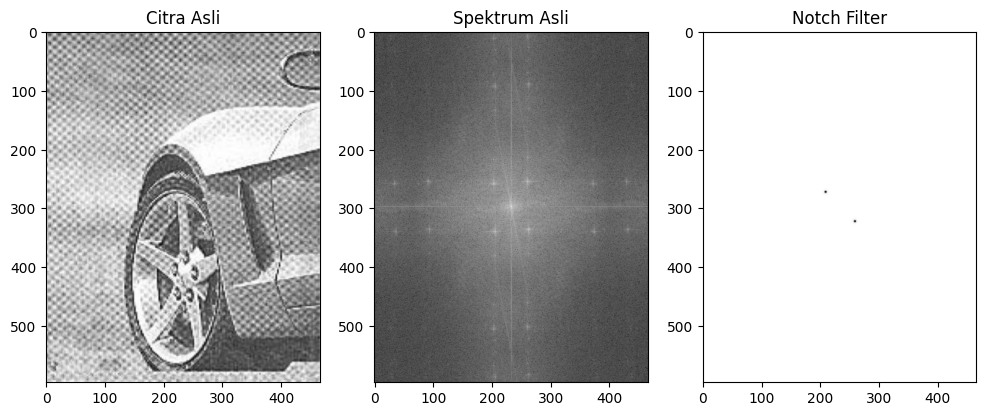

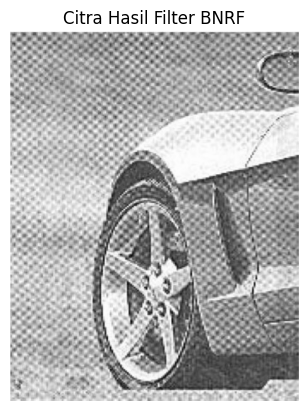

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def butterworth_notch_reject(shape, notch_centers, D0, n):
    M, N = shape
    H = np.ones((M, N))
    U, V = np.meshgrid(np.arange(N), np.arange(M))
    for u_k, v_k in notch_centers:
        Dk = np.sqrt((U - N//2 - u_k)**2 + (V - M//2 - v_k)**2)
        D_k_neg = np.sqrt((U - N//2 + u_k)**2 + (V - M//2 + v_k)**2)
        H *= 1 / (1 + ((D0**2 / (Dk * D_k_neg + 1e-5))**(2*n)))
    return H

# Load image & apply FFT
img = cv2.imread('/content/mobil.jpg', cv2.IMREAD_GRAYSCALE)
F = np.fft.fft2(img)
F_shift = np.fft.fftshift(F)

# Tentukan pusat notch (dalam koordinat relatif terhadap pusat)
notch_coords = [(25, 25), (-25, -25)]
H = butterworth_notch_reject(img.shape, notch_coords, D0=10, n=2)

# Terapkan filter
G_shift = F_shift * H
G = np.fft.ifftshift(G_shift)
img_filtered = np.abs(np.fft.ifft2(G))

# Visualisasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Citra Asli')
plt.subplot(1, 3, 2), plt.imshow(np.log(1 + np.abs(F_shift)), cmap='gray'), plt.title('Spektrum Asli')
plt.subplot(1, 3, 3), plt.imshow(H, cmap='gray'), plt.title('Notch Filter')
plt.show()

plt.figure()
plt.imshow(img_filtered, cmap='gray')
plt.title('Citra Hasil Filter BNRF')
plt.axis('off')
plt.show()